# Analise exploratória preliminar dos dados de Heart Diseases. 

Dados disponíveis em: https://archive.ics.uci.edu/dataset/45/heart+disease

Hipoteses a serem respondidas. 

## Objetivo do Projeto

O objetivo principal é analisar fatores de risco associados à presença de doenças cardíacas e representar visualmente as relações mais relevantes entre variáveis clínicas dos pacientes, conforme especificado nos requisitos.

## Perguntas Centrais

1.  A idade e o sexo estão relacionados com a presença de doença cardíaca?
2.  Como a frequência cardíaca máxima (thalach) e o nível de colesterol (chol) variam entre pacientes com e sem doença cardíaca?
3.  Existe diferença no risco de doença cardíaca entre os diferentes tipos de dor no peito (cp)?

## Variáveis Principais

Os dados contemplam pacientes do hospital de Cleveland, com as seguintes variáveis principais:

*   **Demográficas**: `age` (idade), `sex` (sexo).
*   **Clínicas**: `trestbps` (pressão sanguínea em repouso), `chol` (colesterol sérico), `thalach` (frequência cardíaca máxima atingida), `exang` (angina induzida por exercício), `oldpeak` (depressão de ST induzida por exercício em relação ao repouso), `cp` (tipo de dor no peito), `restecg` (resultados do eletrocardiograma em repouso).
*   **Variável Alvo**: `num` (diagnóstico de doença cardíaca, onde 0 = ausência e 1 = presença).

O foco será entender padrões de correlação e diferenças entre pacientes doentes e saudáveis.

In [120]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'num'
]
# metadata 
df = pd.read_csv('data/heart+disease 3/processed.cleveland.data', header=None, names=column_names)



### Tratamento valores vazios

In [121]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [122]:
df['cp'].unique()

array([1., 4., 3., 2.])

### Variáveis Dataset (input X)

In [123]:
X = df.drop('num', axis=1)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Binarize target variable

## Caracterização dos dados

- cálculo das medidas de Localização

- Medidas de Dispersão

- Medidas de Forma e Distribuição

Variáveis Numericas:

    - Age: idade

    - trestbps: pressao sanguinea repouso

    - chol: colesterol

    - thalach: Maxima taxa de Batimento Cardiacos

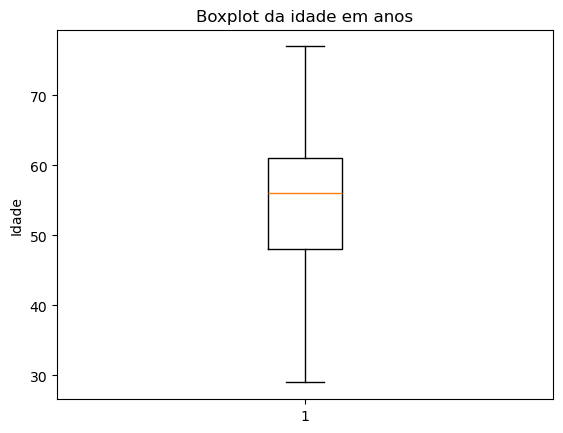

In [18]:
plt.boxplot(X['age'])
plt.title('Boxplot da idade em anos')
plt.ylabel('Idade')
plt.show()

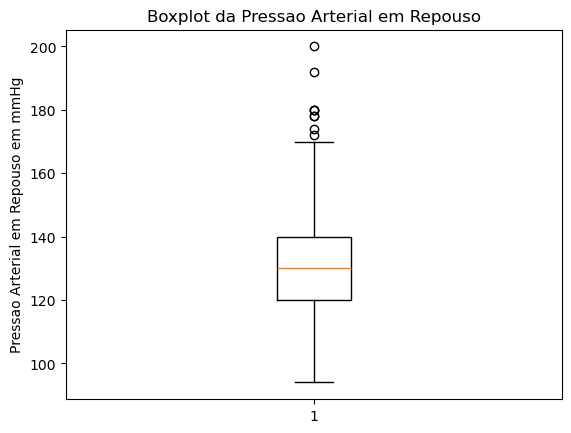

In [19]:
plt.boxplot(X['trestbps'])
plt.title('Boxplot da Pressao Arterial em Repouso') 
plt.ylabel('Pressao Arterial em Repouso em mmHg')
plt.show()

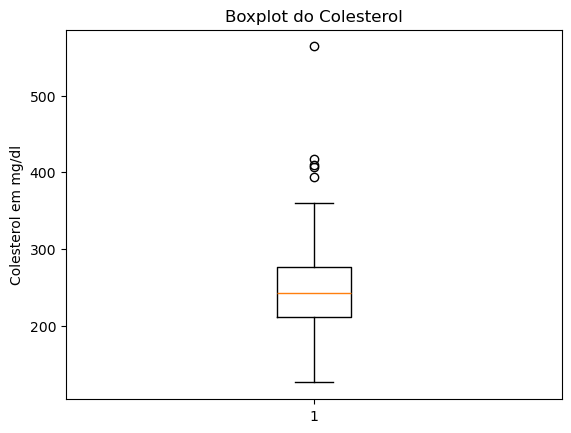

In [20]:
plt.boxplot(X['chol'])
plt.title('Boxplot do Colesterol')
plt.ylabel('Colesterol em mg/dl')
plt.show()

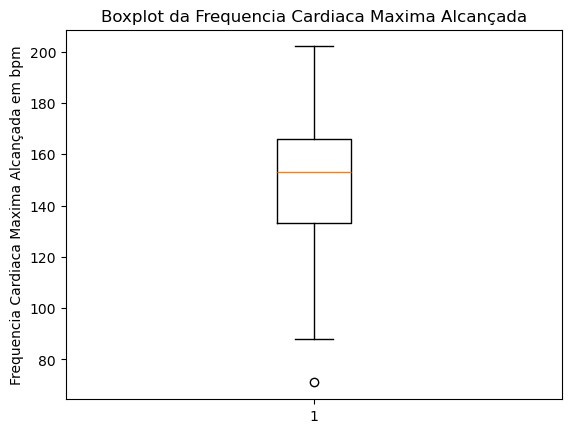

In [21]:
plt.boxplot(X['thalach'])
plt.title('Boxplot da Frequencia Cardiaca Maxima Alcançada')
plt.ylabel('Frequencia Cardiaca Maxima Alcançada em bpm')
plt.show()

In [22]:
df['num'].unique()

array([0, 1])

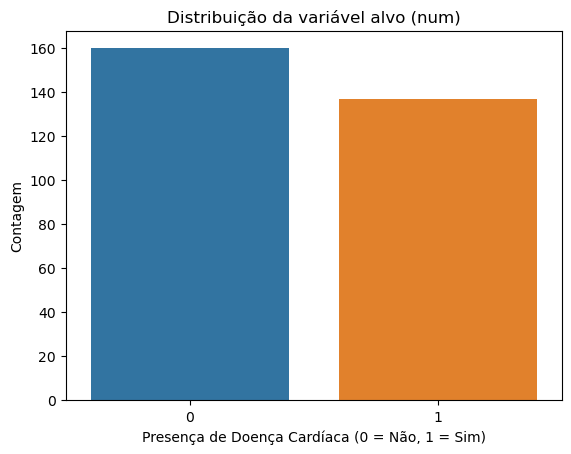

In [36]:
sns.countplot(x='num', data=df)
plt.title('Distribuição da variável alvo (num)')
plt.xlabel('Presença de Doença Cardíaca (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


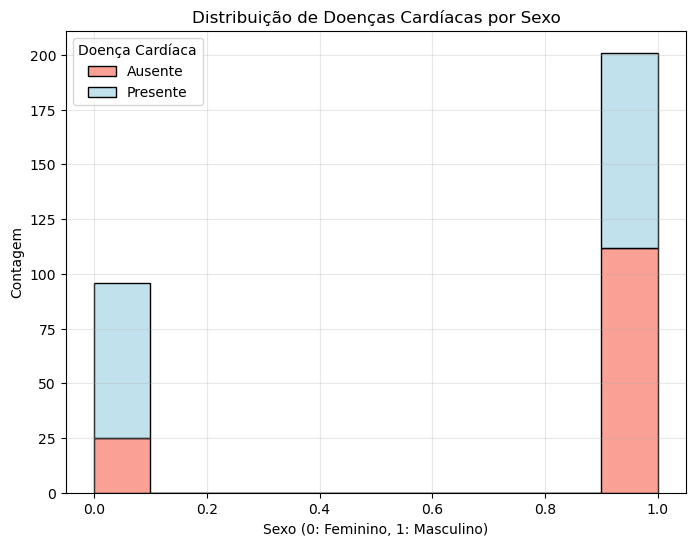

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sex', hue='num', multiple="stack", palette=['lightblue', 'salmon'])
plt.title('Distribuição de Doenças Cardíacas por Sexo')
plt.xlabel('Sexo (0: Feminino, 1: Masculino)')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca', labels=['Ausente', 'Presente'])
plt.grid(True, alpha=0.3)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1200x1000 with 0 Axes>

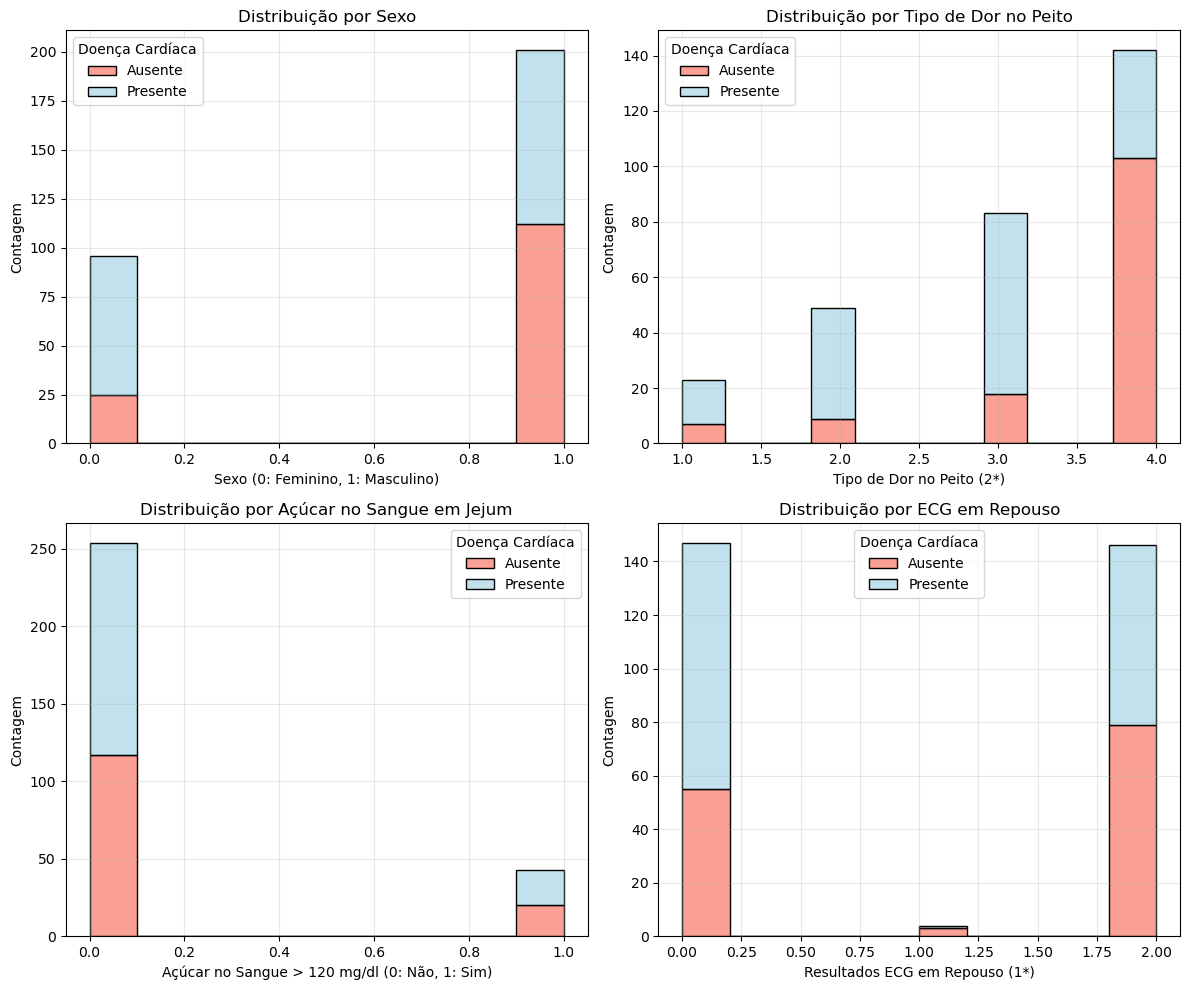

In [24]:
# Create subplots for each categorical variable
plt.figure(figsize=(12, 10))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Variables to plot
variables = ['sex', 'cp', 'fbs', 'restecg']
titles = ['Distribuição por Sexo', 
          'Distribuição por Tipo de Dor no Peito',
          'Distribuição por Açúcar no Sangue em Jejum',
          'Distribuição por ECG em Repouso']
xlabels = ['Sexo (0: Feminino, 1: Masculino)',
           'Tipo de Dor no Peito (2*)', #1 Angina Típica, 2 Angina Atípica, 3 Dor Não Anginosa, 4 Assintomático
           'Açúcar no Sangue > 120 mg/dl (0: Não, 1: Sim)',
           'Resultados ECG em Repouso (1*)'] #0 Normal, 1 Anormalidade de ST-T, 2 Hipertrofia Ventricular Esquerda

# Plot each variable
for idx, (var, title, xlabel) in enumerate(zip(variables, titles, xlabels)):
    row = idx // 2
    col = idx % 2
    
    sns.histplot(data=df, x=var, hue='num', multiple="stack", 
                palette=['lightblue', 'salmon'], ax=axes[row,col])
    axes[row,col].set_title(title)
    axes[row,col].set_xlabel(xlabel)
    axes[row,col].set_ylabel('Contagem')
    axes[row,col].legend(title='Doença Cardíaca', labels=['Ausente', 'Presente'])
    axes[row,col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
df[df['cp'] == 1]['num'].value_counts()

num
0    16
1     7
Name: count, dtype: int64

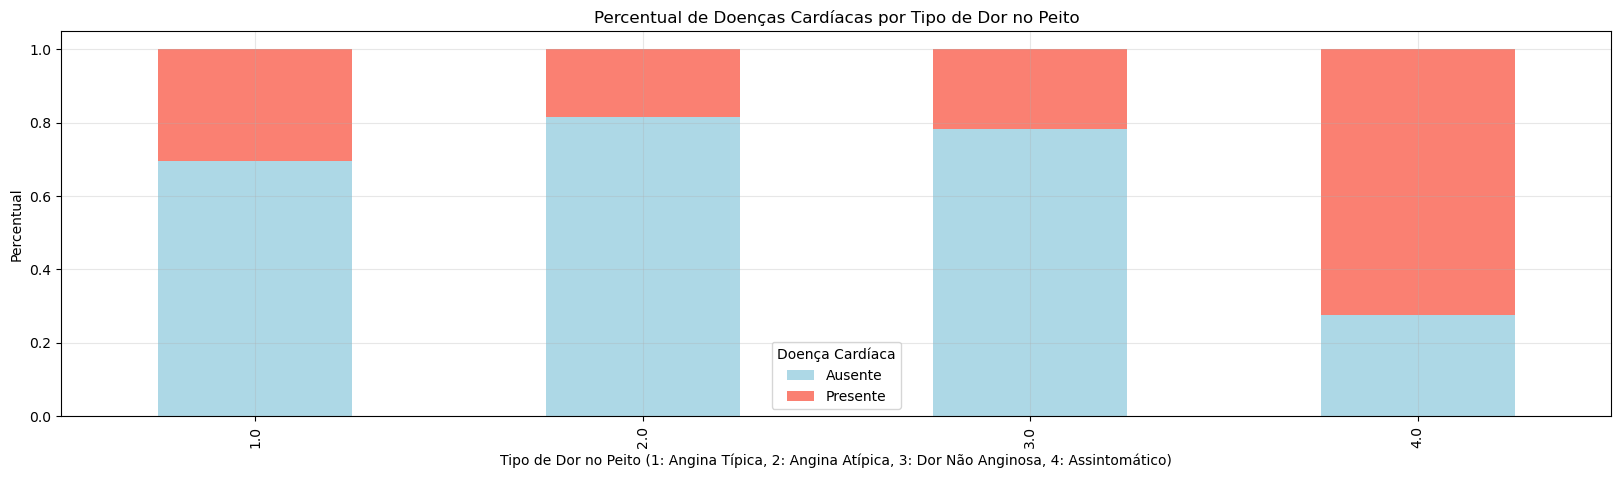

In [ ]:
# grafico de tipo de dor no peito vs num. contendo o percentual de cada categoria. coloque o rotulo x como 1 Angina Típica, 2 Angina Atípica, 3 Dor Não Anginosa, 4 Assintomático
cp_num_counts = df.groupby('cp')['num'].value_counts(normalize=True).unstack().fillna(0)
cp_num_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.rcParams["figure.figsize"] = (20,5)
plt.title('Percentual de Doenças Cardíacas por Tipo de Dor no Peito')
plt.xlabel('Tipo de Dor no Peito (1: Angina Típica, 2: Angina Atípica, 3: Dor Não Anginosa, 4: Assintomático)')
plt.ylabel('Percentual')
plt.legend(title='Doença Cardíaca', labels=['Ausente', 'Presente'])
plt.grid(True, alpha=0.3)
plt.show()

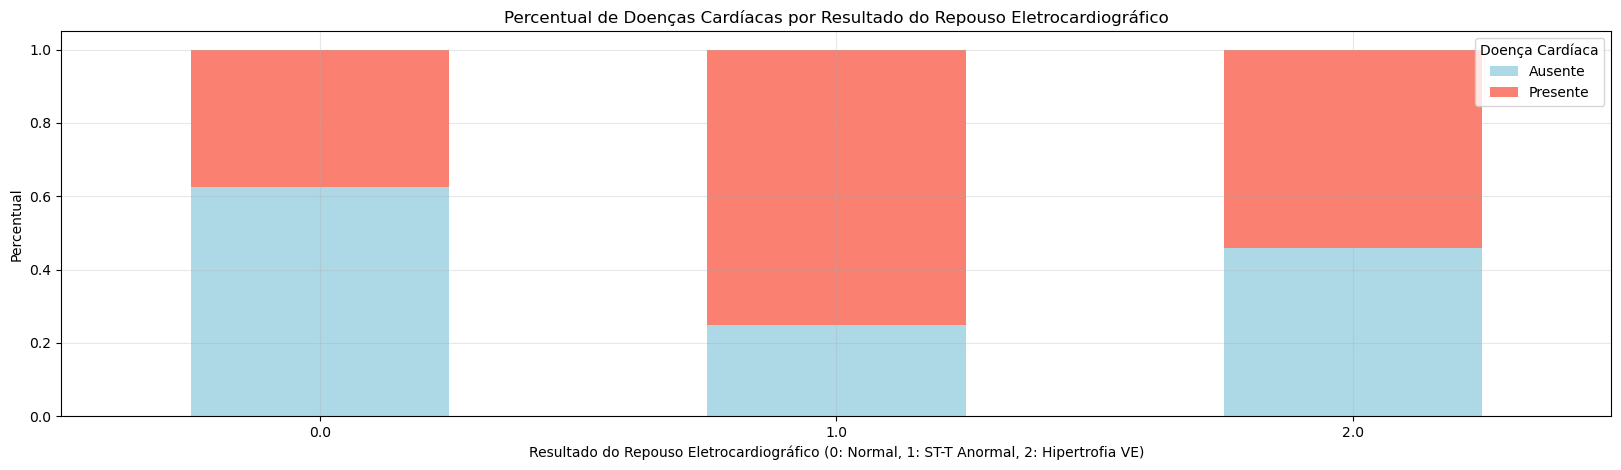

In [54]:
# Gráfico de resultado do repouso eletrocardiográfico vs num, contendo o percentual de cada categoria
restecg_num_counts = df.groupby('restecg')['num'].value_counts(normalize=True).unstack().fillna(0)

plt.rcParams["figure.figsize"] = (20, 5)
restecg_num_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Percentual de Doenças Cardíacas por Resultado do Repouso Eletrocardiográfico')
plt.xlabel('Resultado do Repouso Eletrocardiográfico (0: Normal, 1: ST-T Anormal, 2: Hipertrofia VE)')
plt.ylabel('Percentual')
plt.xticks(rotation=0)
plt.legend(title='Doença Cardíaca', labels=['Ausente', 'Presente'])
plt.grid(True, alpha=0.3)
plt.show()

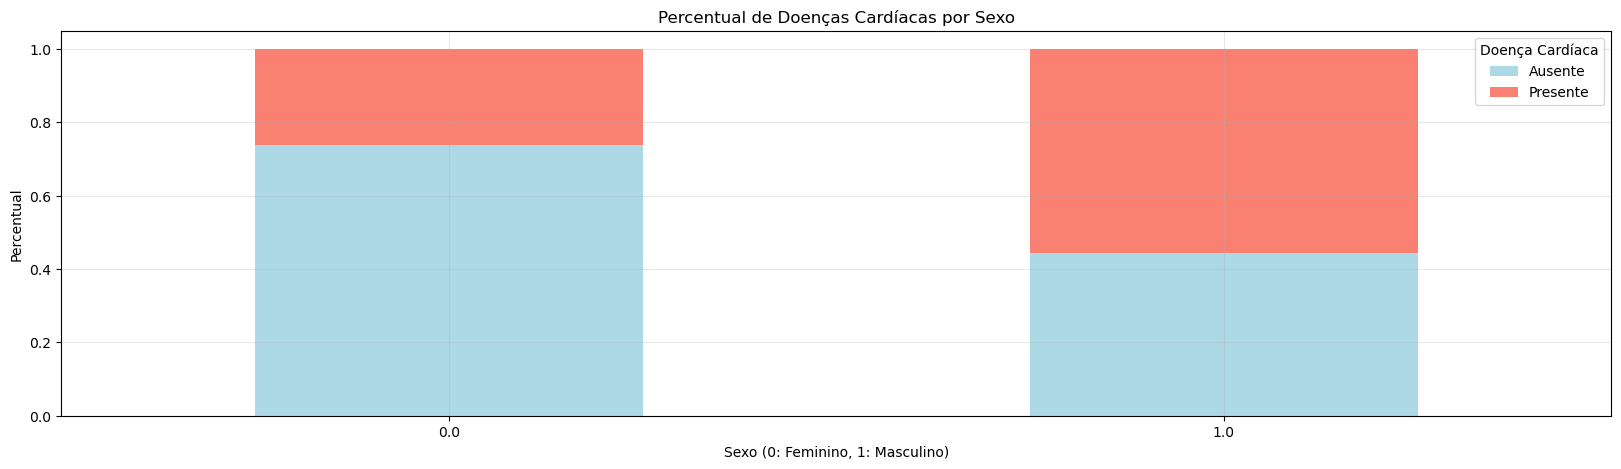

In [57]:
# Gráfico de resultado do repouso eletrocardiográfico vs num, contendo o percentual de cada categoria
restecg_num_counts = df.groupby('sex')['num'].value_counts(normalize=True).unstack().fillna(0)

plt.rcParams["figure.figsize"] = (20, 5)
restecg_num_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Percentual de Doenças Cardíacas por Sexo')
plt.xlabel('Sexo (0: Feminino, 1: Masculino)')
plt.ylabel('Percentual')
plt.xticks(rotation=0)
plt.legend(title='Doença Cardíaca', labels=['Ausente', 'Presente'])
plt.grid(True, alpha=0.3)
plt.show()

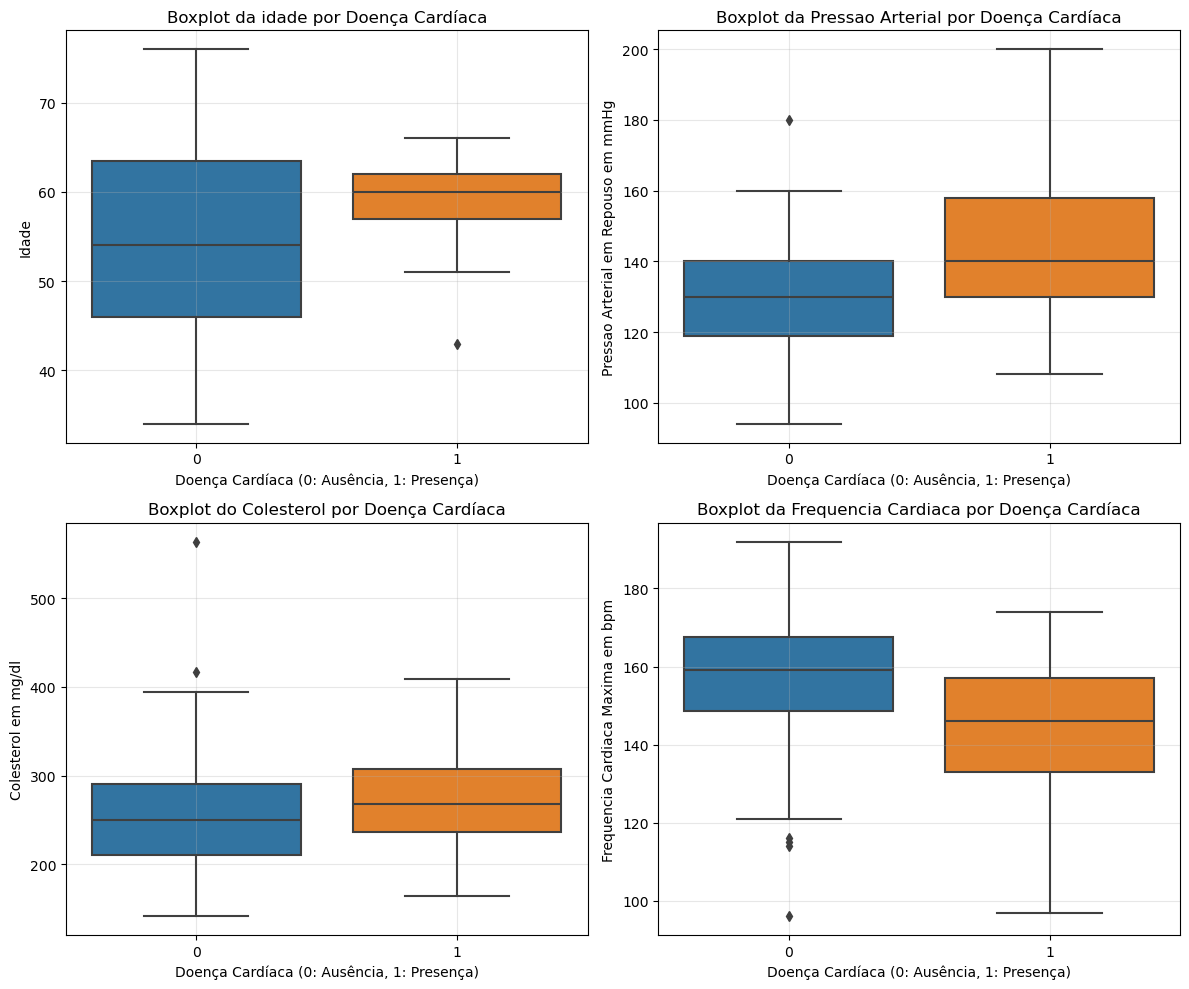

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df1= df[df['sex']==0]
# Boxplot for age by disease status
sns.boxplot(x='num', y='age', data=df1, ax=axes[0,0])
axes[0,0].set_title('Boxplot da idade por Doença Cardíaca')
axes[0,0].set_ylabel('Idade')
axes[0,0].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)')
axes[0,0].grid(True, alpha=0.3)
# Boxplot for blood pressure by disease status
sns.boxplot(x='num', y='trestbps', data=df1, ax=axes[0,1])
axes[0,1].set_title('Boxplot da Pressao Arterial por Doença Cardíaca')
axes[0,1].set_ylabel('Pressao Arterial em Repouso em mmHg')
axes[0,1].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)')
axes[0,1].grid(True, alpha=0.3)
# Boxplot for cholesterol by disease status
sns.boxplot(x='num', y='chol', data=df1, ax=axes[1,0])
axes[1,0].set_title('Boxplot do Colesterol por Doença Cardíaca')
axes[1,0].set_ylabel('Colesterol em mg/dl')
axes[1,0].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)')
axes[1,0].grid(True, alpha=0.3)
# Boxplot for heart rate by disease status
sns.boxplot(x='num', y='thalach', data=df1, ax=axes[1,1])
axes[1,1].set_title('Boxplot da Frequencia Cardiaca por Doença Cardíaca')
axes[1,1].set_ylabel('Frequencia Cardiaca Maxima em bpm')
axes[1,1].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)')
axes[1,1].grid(True, alpha=0.3)
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

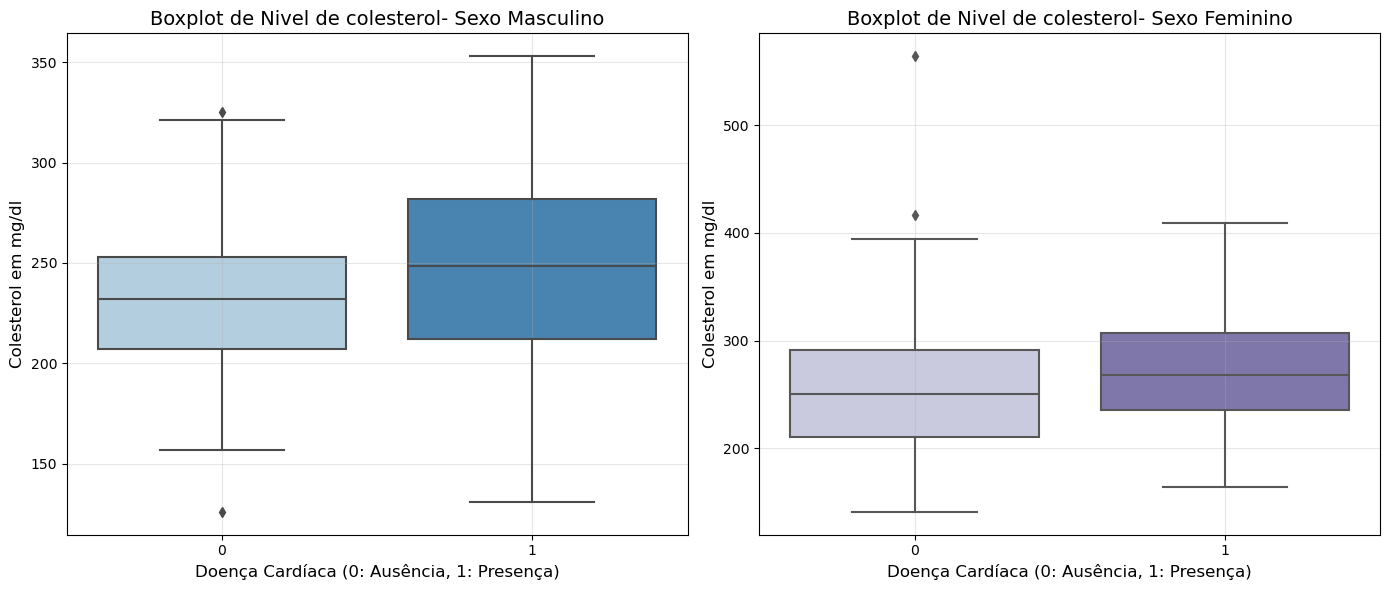

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for males (sex == 1)
df_male = df[df['sex'] == 1.0]
sns.boxplot(x='num', y='chol', data=df_male, ax=axes[0], palette='Blues')
axes[0].set_title('Boxplot de Nivel de colesterol- Sexo Masculino', size=14)
axes[0].set_ylabel('Colesterol em mg/dl', size=12)
axes[0].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)', size=12)
axes[0].grid(True, alpha=0.3)

# Boxplot for females (sex == 0)
df_female = df[df['sex'] == 0.0]
sns.boxplot(x='num', y='chol', data=df_female, ax=axes[1], palette='Purples')
axes[1].set_title('Boxplot de Nivel de colesterol- Sexo Feminino', size=14)
axes[1].set_ylabel('Colesterol em mg/dl', size=12)
axes[1].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)', size=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

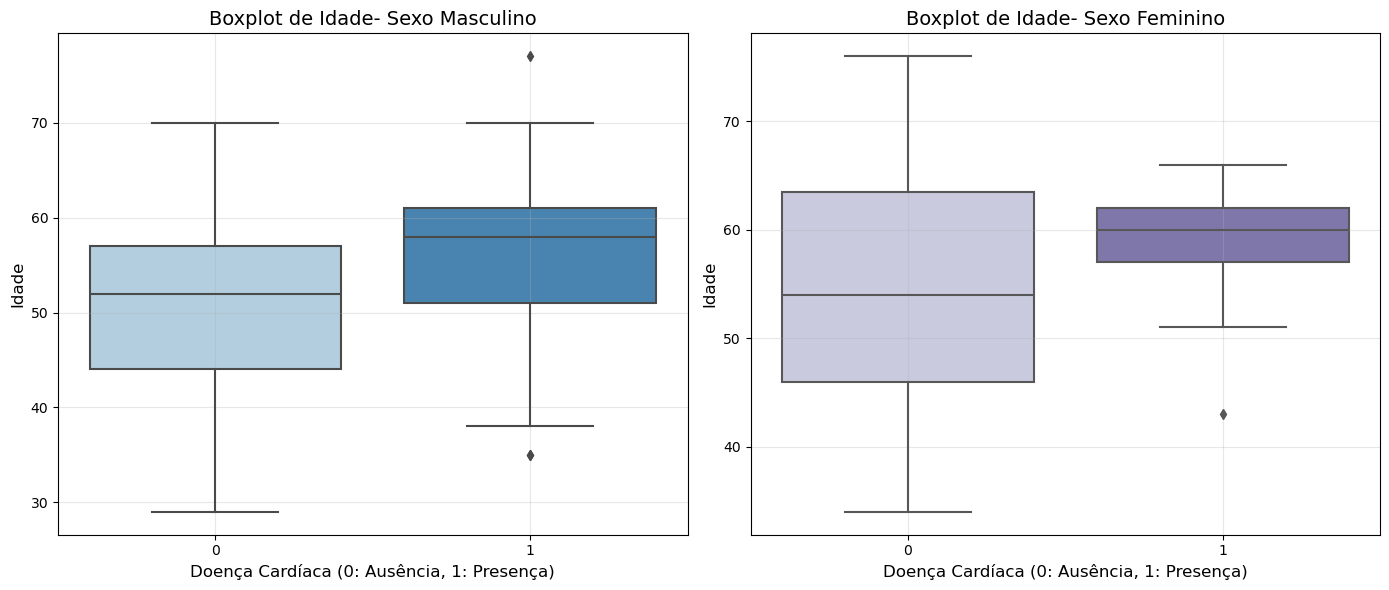

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for males (sex == 1)
df_male = df[df['sex'] == 1.0]
sns.boxplot(x='num', y='age', data=df_male, ax=axes[0], palette='Blues')
axes[0].set_title('Boxplot de Idade- Sexo Masculino', size=14)
axes[0].set_ylabel('Idade', size=12)
axes[0].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)', size=12)
axes[0].grid(True, alpha=0.3)

# Boxplot for females (sex == 0)
df_female = df[df['sex'] == 0.0]
sns.boxplot(x='num', y='age', data=df_female, ax=axes[1], palette='Purples')
axes[1].set_title('Boxplot de Idade- Sexo Feminino', size=14)
axes[1].set_ylabel('Idade', size=12)
axes[1].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)', size=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [125]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


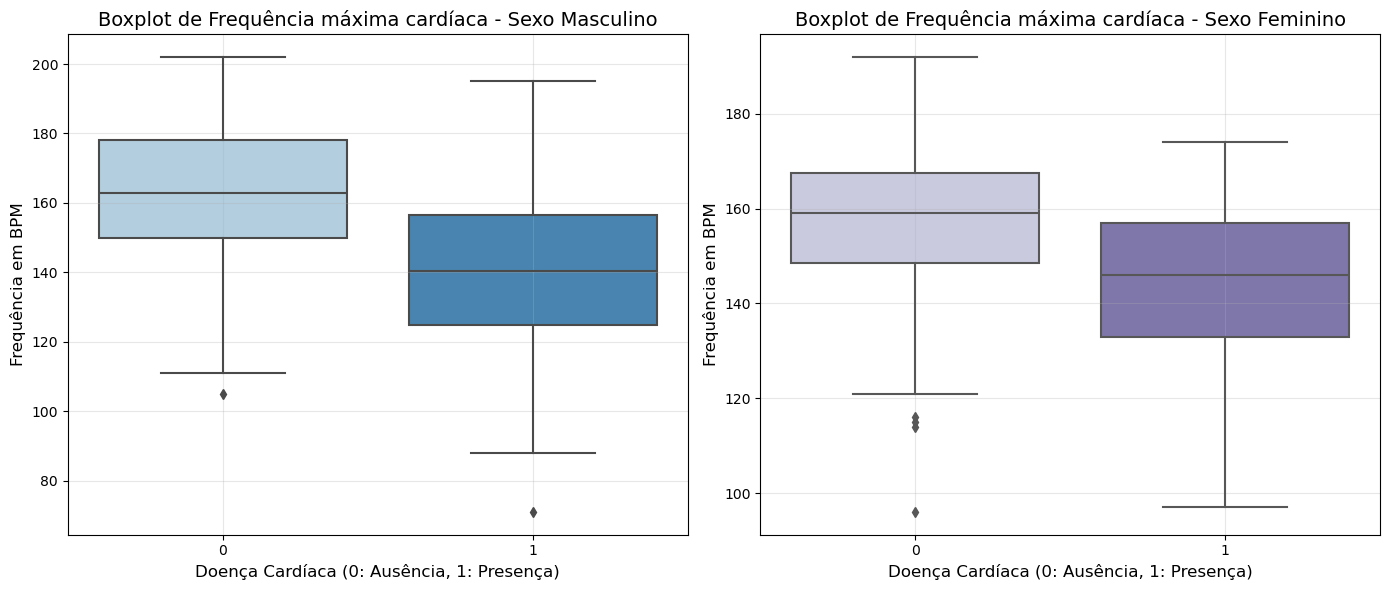

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for males (sex == 1)
df_male = df[df['sex'] == 1.0]
sns.boxplot(x='num', y='thalach', data=df_male, ax=axes[0], palette='Blues')
axes[0].set_title('Boxplot de Frequência máxima cardíaca - Sexo Masculino', size=14)
axes[0].set_ylabel('Frequência em BPM', size=12)
axes[0].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)', size=12)
axes[0].grid(True, alpha=0.3)

# Boxplot for females (sex == 0)
df_female = df[df['sex'] == 0.0]
sns.boxplot(x='num', y='thalach', data=df_female, ax=axes[1], palette='Purples')
axes[1].set_title('Boxplot de Frequência máxima cardíaca - Sexo Feminino', size=14)
axes[1].set_ylabel('Frequência em BPM', size=12)
axes[1].set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)', size=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

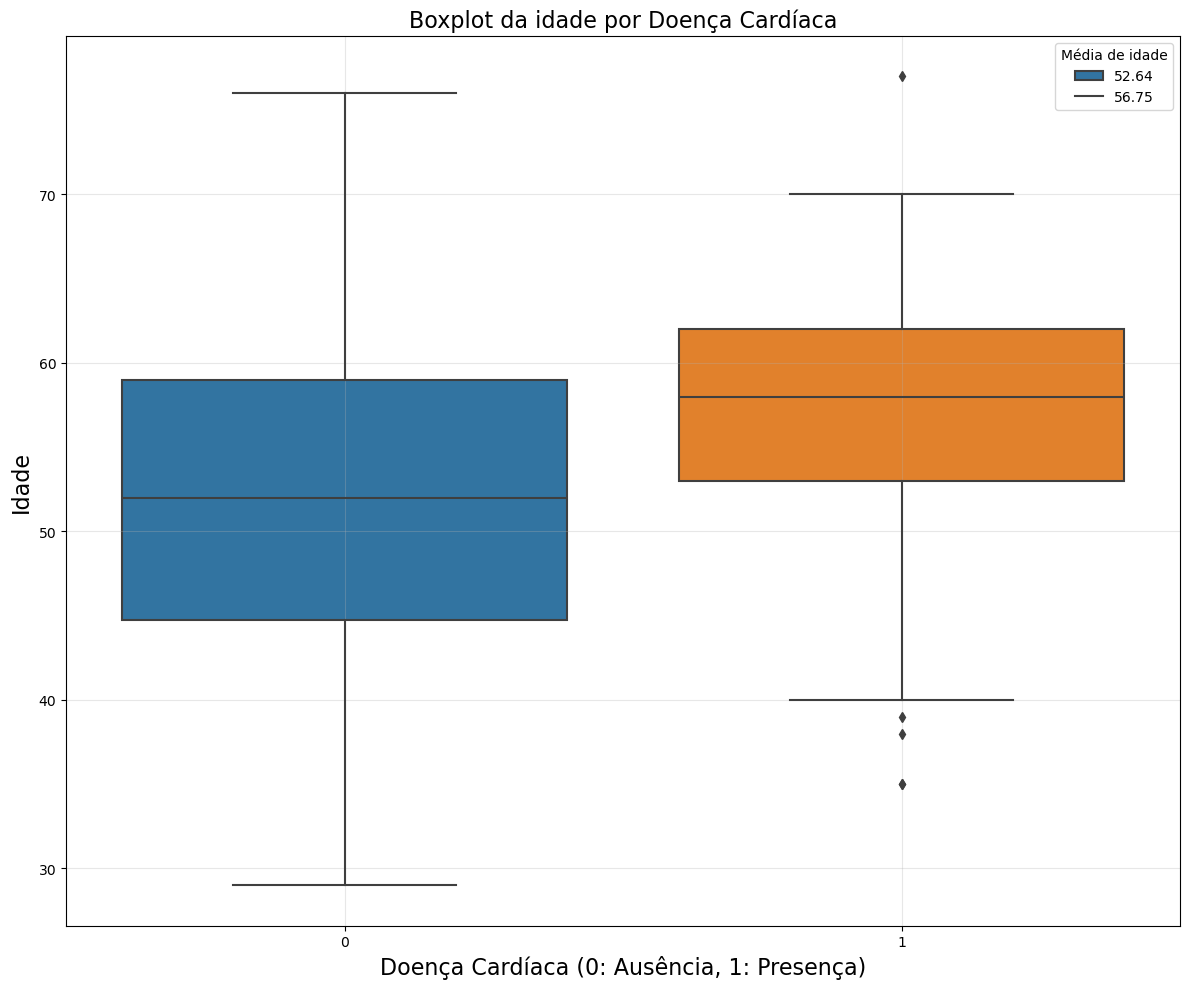

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(12, 10))

# Boxplot for age by disease status
sns.boxplot(x='num', y='age', data=df)
axes.set_title('Boxplot da idade por Doença Cardíaca', size=16)
axes.set_ylabel('Idade',size=16)
axes.set_xlabel('Doença Cardíaca (0: Ausência, 1: Presença)',size=16)
axes.grid(True, alpha=0.3)
axes.legend(title='Média de idade', labels=[52.64, 56.75])
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

In [29]:
print("Resumo Estatístico das Variáveis Numéricas:")
print(X.describe())
print("\nDistribuição das Variáveis Categóricas:")
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for var in categorical_vars:
    print(f"\n{var}:\n{X[var].value_counts()}")
print(X.head())
print(y.head())      

Resumo Estatístico das Variáveis Numéricas:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope  
count  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694  
std      0.994914   22

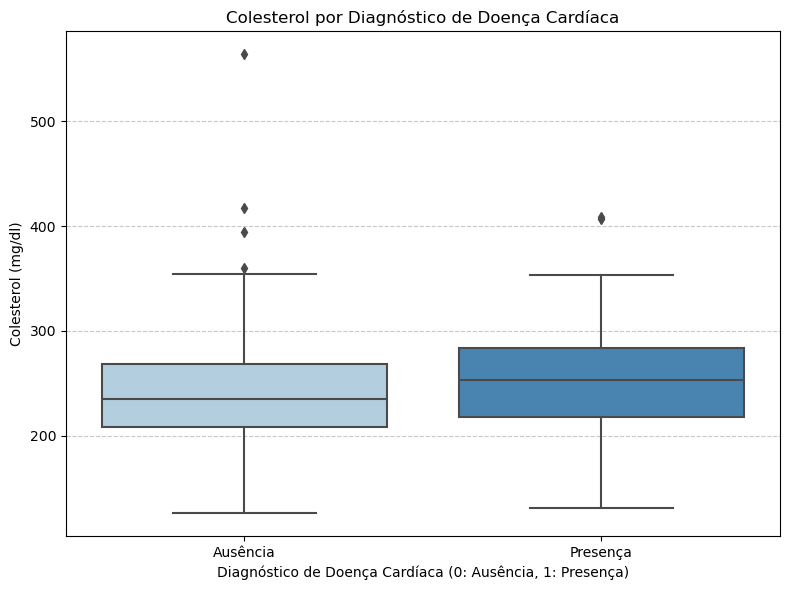

In [30]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='chol', data=df, palette='Blues')
plt.title('Colesterol por Diagnóstico de Doença Cardíaca')
plt.xlabel('Diagnóstico de Doença Cardíaca (0: Ausência, 1: Presença)')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks(ticks=[0, 1], labels=[
    'Ausência', 'Presença'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
df[['num','thalach']]

,num,thalach
0,0,150.0
1,1,108.0
2,1,129.0
3,0,187.0
4,0,172.0
...,...,...
297,1,123.0
298,1,132.0
299,1,141.0
300,1,115.0


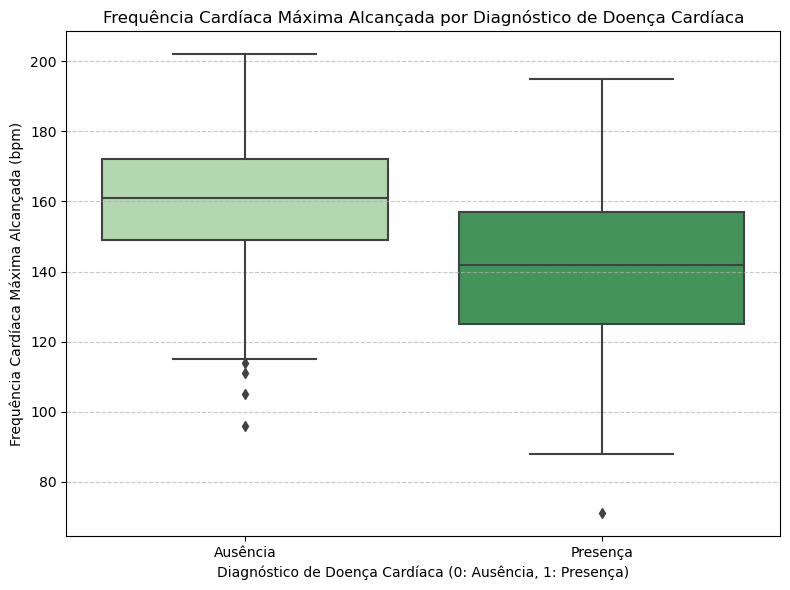

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='thalach', data=df, palette='Greens')
plt.title('Frequência Cardíaca Máxima Alcançada por Diagnóstico de Doença Cardíaca')
plt.xlabel('Diagnóstico de Doença Cardíaca (0: Ausência, 1: Presença)')
plt.ylabel('Frequência Cardíaca Máxima Alcançada (bpm)')
plt.xticks(ticks=[0, 1], labels=[
    'Ausência', 'Presença'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlação entre as variáveis numéricas:
             age  trestbps    chol  thalach  oldpeak
age       1.0000    0.2905  0.2026  -0.3946   0.1971
trestbps  0.2905    1.0000  0.1315  -0.0491   0.1912
chol      0.2026    0.1315  1.0000  -0.0001   0.0386
thalach  -0.3946   -0.0491 -0.0001   1.0000  -0.3476
oldpeak   0.1971    0.1912  0.0386  -0.3476   1.0000


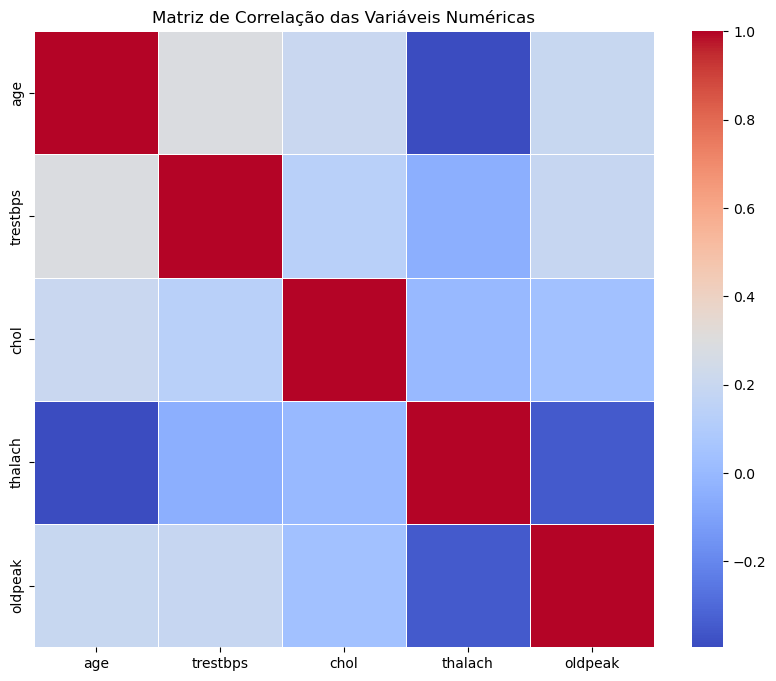

In [86]:

print("Correlação entre as variáveis numéricas:")
categ =  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
df_corr = df.drop(columns=categ).round(4)
corr = (df_corr.corr().round(4))
print(corr)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm',fmt=".1f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [ ]:
##

## Execucao dos modelos de aprendizado de máquina

In [152]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

X = df.drop('num', axis=1)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Binarize target variable
# Assumindo que você já tem X e y definidos
X = pd.get_dummies(X, columns=[
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo os modelos
models = {
    'Logistic Regression': LogisticRegression(),
    #'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
   # 'KNN': KNeighborsClassifier(),
   # 'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(), 
    'Gradient Boosting': GradientBoostingClassifier()
}

# Configurando K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Dicionários para armazenar resultados
accuracies = {name: [] for name in models.keys()}
sensitivities = {name: [] for name in models.keys()}

# Para cada modelo
for name, model in models.items():
    print(f'\nAvaliando {name}:')
    
    # Para cada fold
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        # Separar dados de treino e validação
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        X_fold_train = np.array(X_fold_train)
        X_fold_val = np.array(X_fold_val)
        y_fold_train = np.array(y_fold_train).ravel()
        y_fold_val = np.array(y_fold_val).ravel()
        # Treinar e predizer
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        
        # Calcular métricas
        acc = accuracy_score(y_fold_val, y_pred)
        sens = recall_score(y_fold_val, y_pred, average='macro')
        
        accuracies[name].append(acc)
        sensitivities[name].append(sens)
        
        print(f'Fold {fold+1} - Acurácia: {acc:.3f}, Sensibilidade: {sens:.3f}')
    
    # Calcular e mostrar médias
    print(f'Média - Acurácia: {np.mean(accuracies[name]):.3f} (±{np.std(accuracies[name]):.3f})')
    print(f'Média - Sensibilidade: {np.mean(sensitivities[name]):.3f} (±{np.std(sensitivities[name]):.3f})')


Avaliando Logistic Regression:
Fold 1 - Acurácia: 0.917, Sensibilidade: 0.929
Fold 2 - Acurácia: 0.917, Sensibilidade: 0.914
Fold 3 - Acurácia: 0.792, Sensibilidade: 0.792
Fold 4 - Acurácia: 0.833, Sensibilidade: 0.839
Fold 5 - Acurácia: 0.833, Sensibilidade: 0.822
Fold 6 - Acurácia: 0.750, Sensibilidade: 0.755
Fold 7 - Acurácia: 0.667, Sensibilidade: 0.685
Fold 8 - Acurácia: 0.870, Sensibilidade: 0.871
Fold 9 - Acurácia: 1.000, Sensibilidade: 1.000
Fold 10 - Acurácia: 0.870, Sensibilidade: 0.885
Média - Acurácia: 0.845 (±0.089)
Média - Sensibilidade: 0.849 (±0.087)

Avaliando SVM:
Fold 1 - Acurácia: 0.667, Sensibilidade: 0.700
Fold 2 - Acurácia: 0.583, Sensibilidade: 0.557
Fold 3 - Acurácia: 0.708, Sensibilidade: 0.708
Fold 4 - Acurácia: 0.708, Sensibilidade: 0.696
Fold 5 - Acurácia: 0.708, Sensibilidade: 0.678
Fold 6 - Acurácia: 0.667, Sensibilidade: 0.664
Fold 7 - Acurácia: 0.583, Sensibilidade: 0.601
Fold 8 - Acurácia: 0.652, Sensibilidade: 0.675
Fold 9 - Acurácia: 0.609, Sensibil

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Fold 3 - Acurácia: 0.750, Sensibilidade: 0.750
Fold 4 - Acurácia: 0.792, Sensibilidade: 0.787
Fold 5 - Acurácia: 0.833, Sensibilidade: 0.822
Fold 6 - Acurácia: 0.667, Sensibilidade: 0.671
Fold 7 - Acurácia: 0.625, Sensibilidade: 0.640
Fold 8 - Acurácia: 0.783, Sensibilidade: 0.775
Fold 9 - Acurácia: 0.870, Sensibilidade: 0.871
Fold 10 - Acurácia: 0.826, Sensibilidade: 0.846
Média - Acurácia: 0.785 (±0.079)
Média - Sensibilidade: 0.788 (±0.077)

Avaliando Gradient Boosting:
Fold 1 - Acurácia: 0.750, Sensibilidade: 0.757
Fold 2 - Acurácia: 0.833, Sensibilidade: 0.829
Fold 3 - Acurácia: 0.875, Sensibilidade: 0.875
Fold 4 - Acurácia: 0.750, Sensibilidade: 0.762
Fold 5 - Acurácia: 0.875, Sensibilidade: 0.856
Fold 6 - Acurácia: 0.667, Sensibilidade: 0.671
Fold 7 - Acurácia: 0.667, Sensibilidade: 0.685
Fold 8 - Acurácia: 0.783, Sensibilidade: 0.775
Fold 9 - Acurácia: 0.913, Sensibilidade: 0.913
Fold 10 - Acurácia: 0.826, Sensibilidade: 0.835
Média - Acurácia: 0.794 (±0.081)
Média - Sensibilid

In [148]:
accuracies

{'Logistic Regression': [0.9166666666666666,
  0.7916666666666666,
  0.7916666666666666,
  0.75,
  0.875,
  0.7916666666666666,
  0.625,
  0.8695652173913043,
  1.0,
  0.782608695652174],
 'SVM': [0.625,
  0.5833333333333334,
  0.7083333333333334,
  0.7083333333333334,
  0.7083333333333334,
  0.6666666666666666,
  0.5833333333333334,
  0.6086956521739131,
  0.6086956521739131,
  0.6521739130434783],
 'Random Forest': [0.7916666666666666,
  0.9166666666666666,
  0.75,
  0.8333333333333334,
  0.875,
  0.7083333333333334,
  0.6666666666666666,
  0.8260869565217391,
  0.9565217391304348,
  0.8260869565217391],
 'Gradient Boosting': [0.7916666666666666,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.875,
  0.6666666666666666,
  0.6666666666666666,
  0.782608695652174,
  0.9130434782608695,
  0.782608695652174]}

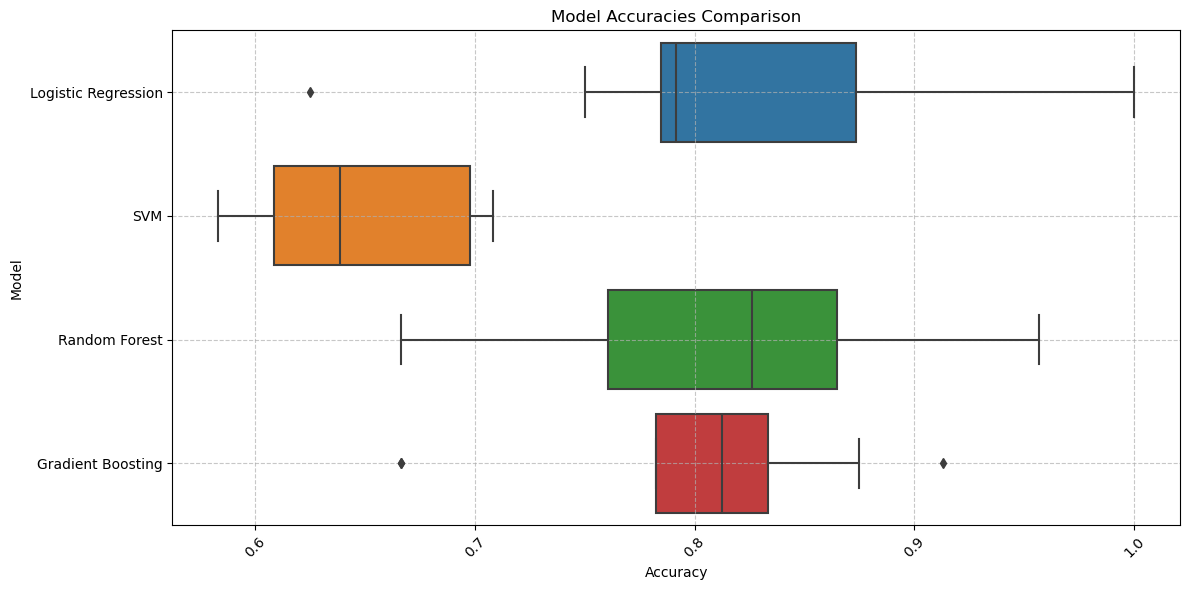

In [149]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Convert the accuracies dictionary to a DataFrame format suitable for boxplot
accuracy_data = []
for model_name, acc_values in accuracies.items():
    for acc in acc_values:
        accuracy_data.append({ 'Accuracy': acc,'Model': model_name})
df_accuracies = pd.DataFrame(accuracy_data)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Accuracy', y='Model', data=df_accuracies)

# Customize the plot
plt.title('Model Accuracies Comparison')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

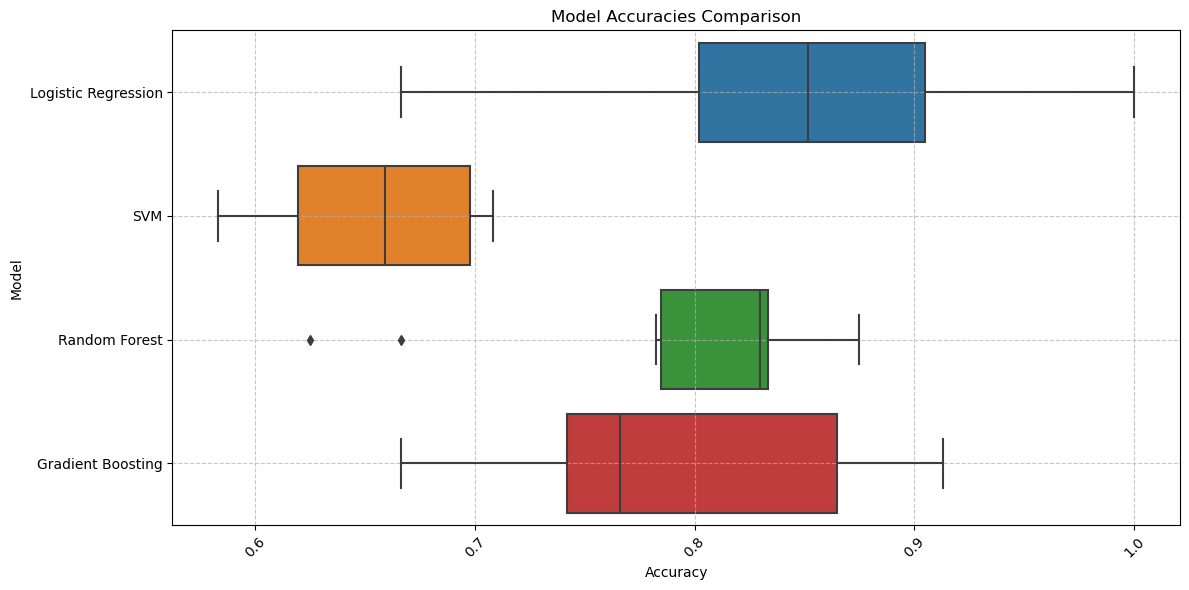

In [80]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Convert the accuracies dictionary to a DataFrame format suitable for boxplot
accuracy_data = []
for model_name, acc_values in accuracies.items():
    for acc in acc_values:
        accuracy_data.append({ 'Accuracy': acc,'Model': model_name})
df_accuracies = pd.DataFrame(accuracy_data)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Accuracy', y='Model', data=df_accuracies)

# Customize the plot
plt.title('Model Accuracies Comparison')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Comparacao com modelos anteriores

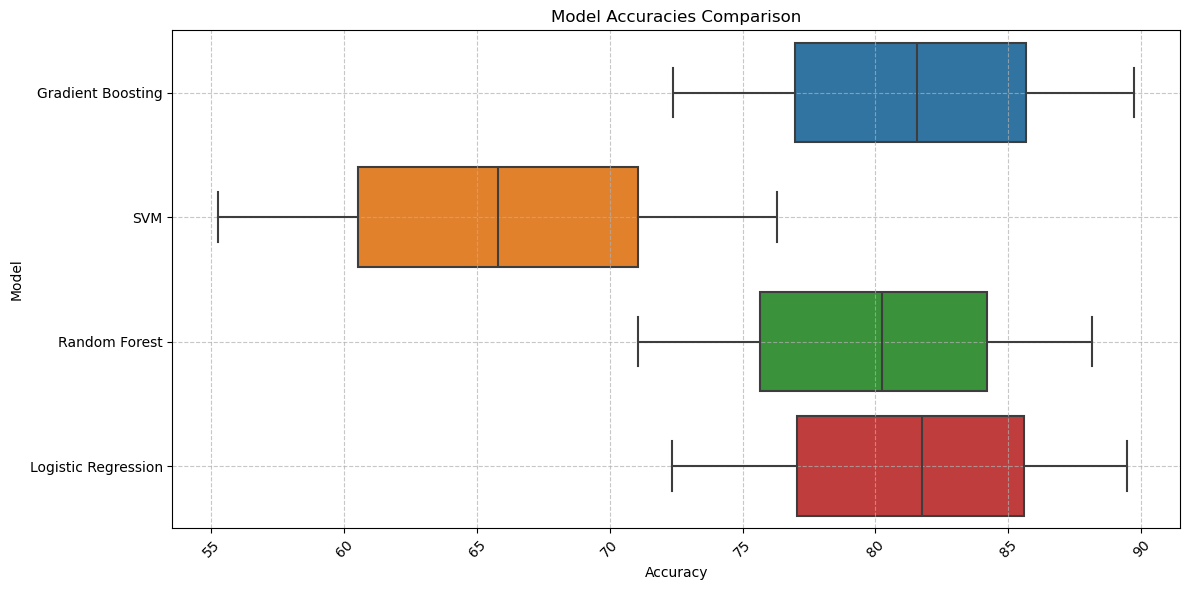

In [81]:
gradientboost = [72.38, 81.57, 89.74]
svm = [55.26,65.78,  76.31 ]
rf = [71.05, 80.26, 88.15]
lr = [72.36, 81.75,89.47]
# gere um gráfico para esses modelos. 
grd = pd.DataFrame({
    'Gradient Boosting': gradientboost,
    'SVM': svm,
    'Random Forest': rf,
    'Logistic Regression': lr
})

# Convert the accuracies dictionary to a DataFrame format suitable for boxplot
accuracy_data = []
for model_name, acc_values in grd.items():
    for acc in acc_values:
        accuracy_data.append({ 'Accuracy': acc,'Model': model_name})
df_accuracies = pd.DataFrame(accuracy_data)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Accuracy', y='Model', data=df_accuracies)

# Customize the plot
plt.title('Model Accuracies Comparison')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()        

## Explicabilidade do modelo

In [146]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [145]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
277,39.0,138.0,220.0,152.0,0.0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
262,60.0,150.0,240.0,171.0,0.9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30,69.0,140.0,239.0,151.0,1.8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
22,58.0,120.0,284.0,160.0,1.8,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False
281,47.0,130.0,253.0,179.0,0.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,50.0,129.0,196.0,163.0,0.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
71,67.0,125.0,254.0,163.0,0.2,True,False,False,True,True,False,False,False,True,False,False,True,False,False,True
107,57.0,128.0,229.0,150.0,0.4,True,False,True,False,False,False,True,False,True,False,True,False,False,False,True
274,59.0,134.0,204.0,162.0,0.8,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False


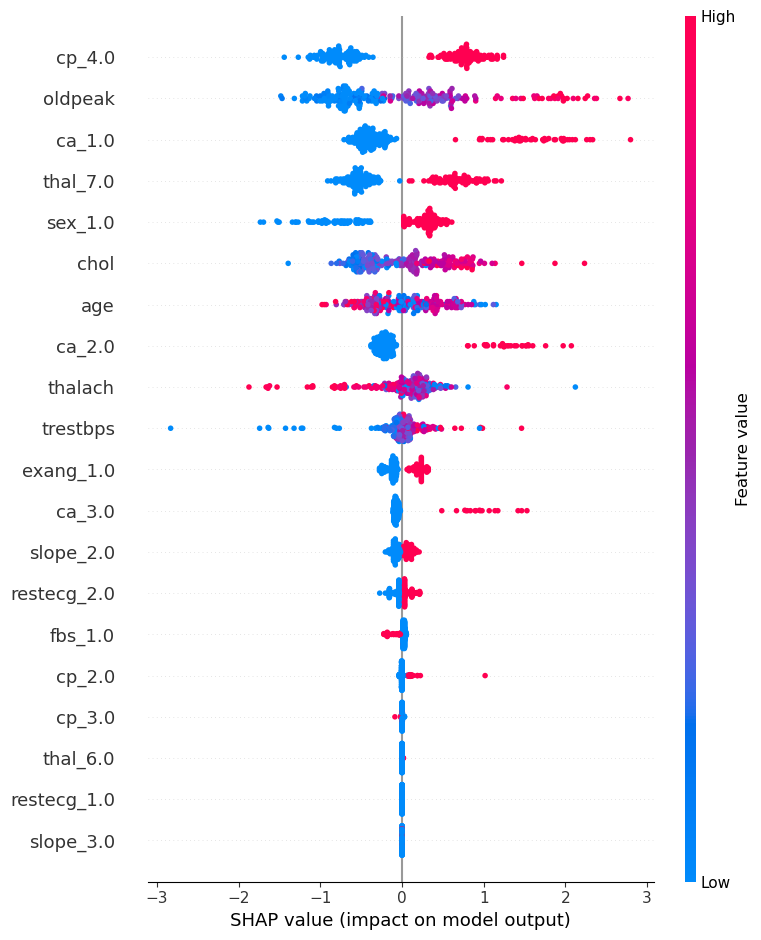

In [153]:
import shap
import shap
x=X_train
explainer = shap.Explainer(models['Gradient Boosting'])
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x)

#

## Salvar modelos 

In [ ]:
import joblib
for name, model in models.items():
    joblib.dump(model, f'model_{name.replace(" ", "_").lower()}.joblib')


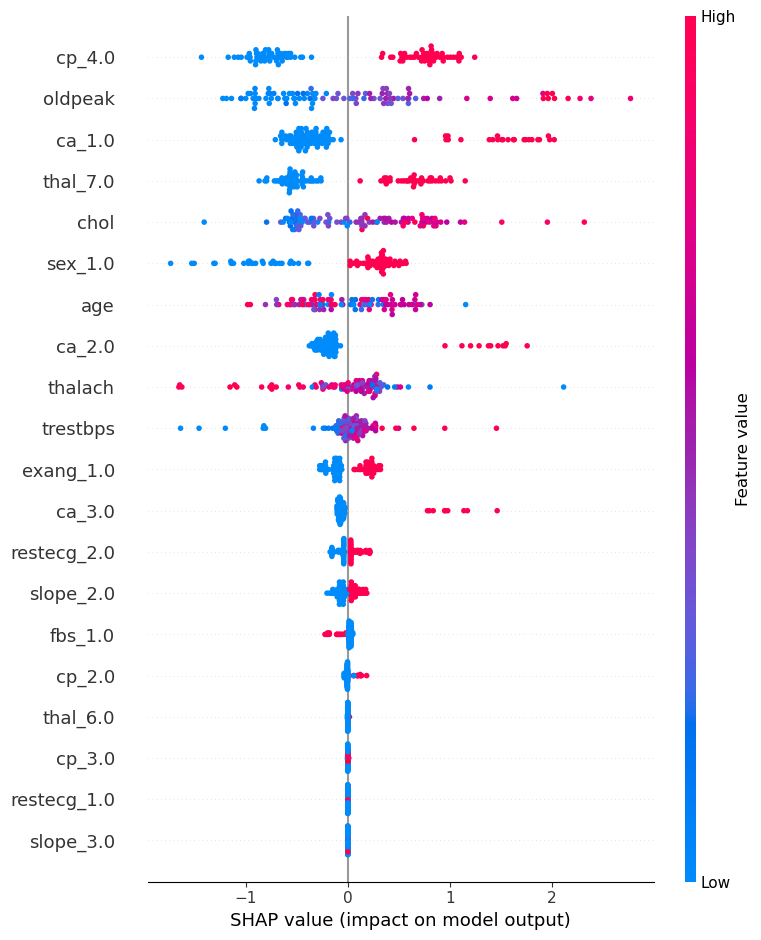